In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df_user_profile = pd.read_csv('/content/drive/MyDrive/PR Project/user_info_format1.csv')
df_user_behavior_logs = pd.read_csv('/content/drive/MyDrive/PR Project/user_log_format1.csv')

# Load the data into a pandas DataFrame
df_train_data = pd.read_csv('/content/drive/MyDrive/PR Project/train_format1.csv')


Overall Purchase Distribution

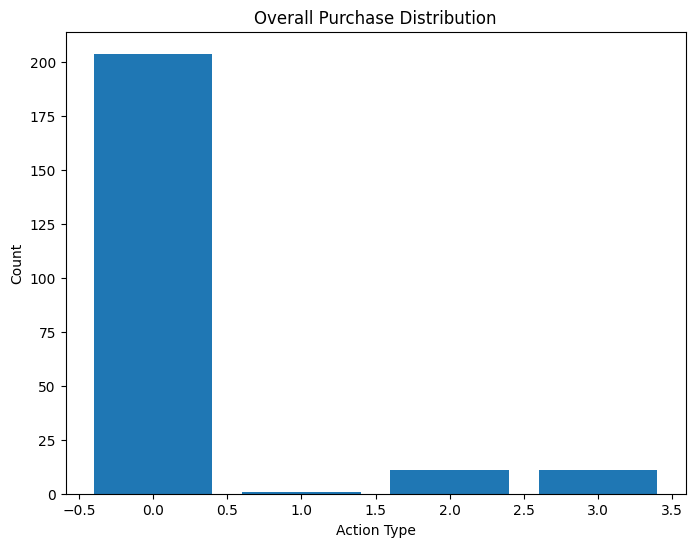

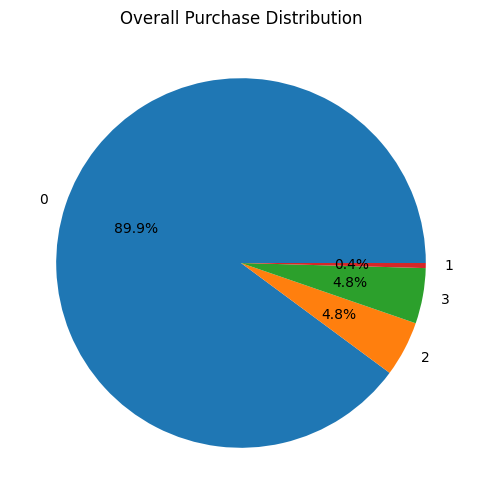

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df_user_behavior_logs = pd.read_csv('/content/drive/MyDrive/PR Project/user_log_format1.csv')

# Count the occurrences of each action type
action_counts = df_user_behavior_logs['action_type'].value_counts()

# Create a bar plot for the action type distribution
plt.figure(figsize=(8, 6))
plt.bar(action_counts.index, action_counts.values)
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.title('Overall Purchase Distribution')
plt.show()

# Create a pie chart for the action type distribution
plt.figure(figsize=(6, 6))
plt.pie(action_counts.values, labels=action_counts.index, autopct='%1.1f%%')
plt.title('Overall Purchase Distribution')
plt.show()


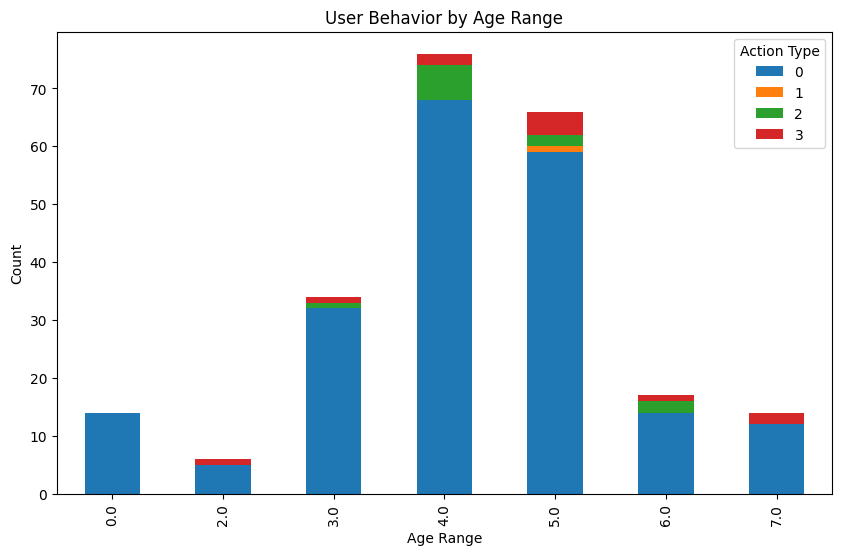

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df_user_profile = pd.read_csv('/content/drive/MyDrive/PR Project/user_info_format1.csv')
df_user_behavior_logs = pd.read_csv('/content/drive/MyDrive/PR Project/user_log_format1.csv')

# Merge the user behavior and user profile data based on user_id
df_merged = pd.merge(df_user_behavior_logs, df_user_profile, on='user_id')

# Count the occurrences of each action type by age range
action_counts_by_age = df_merged.groupby('age_range')['action_type'].value_counts().unstack()

# Create a bar plot for action types by age range
action_counts_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('User Behavior by Age Range')
plt.legend(title='Action Type')
plt.show()


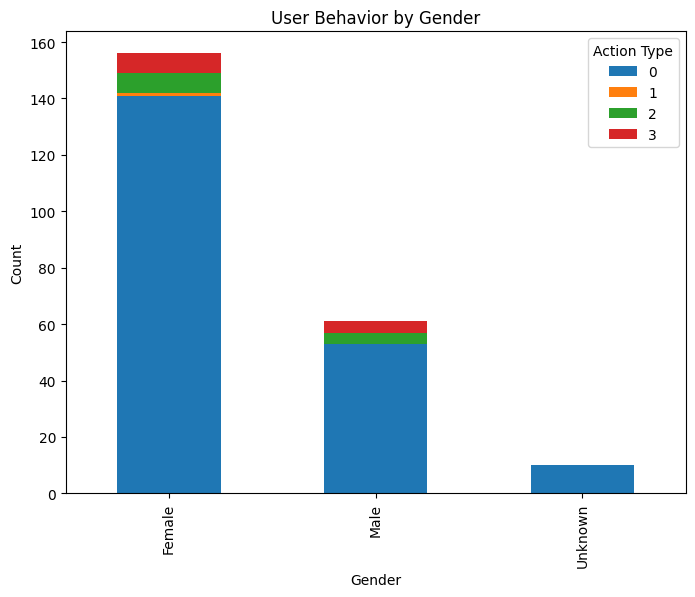

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df_user_profile = pd.read_csv('/content/drive/MyDrive/PR Project/user_info_format1.csv')
df_user_behavior_logs = pd.read_csv('/content/drive/MyDrive/PR Project/user_log_format1.csv')

# Merge the user behavior and user profile data based on user_id
df_merged = pd.merge(df_user_behavior_logs, df_user_profile, on='user_id')

# Count the occurrences of each action type by gender
action_counts_by_gender = df_merged.groupby('gender')['action_type'].value_counts().unstack()

# Create a bar plot for action types by gender
action_counts_by_gender.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('User Behavior by Gender')
plt.legend(title='Action Type')
plt.xticks([0, 1, 2], ['Female', 'Male', 'Unknown'])
plt.show()


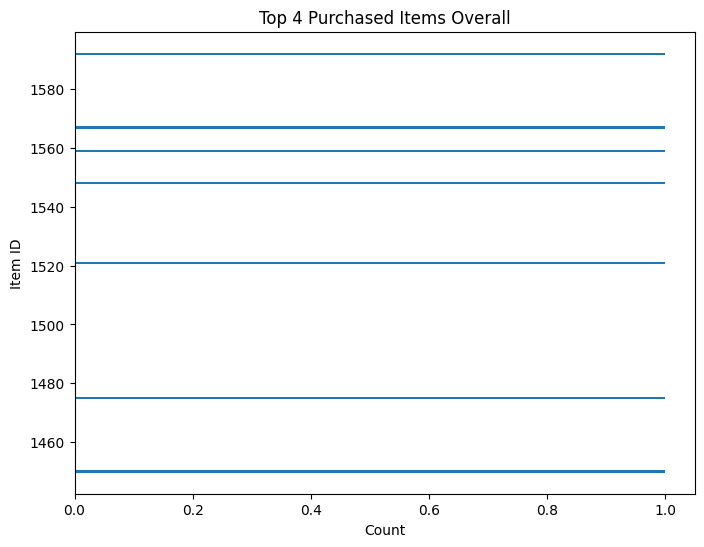

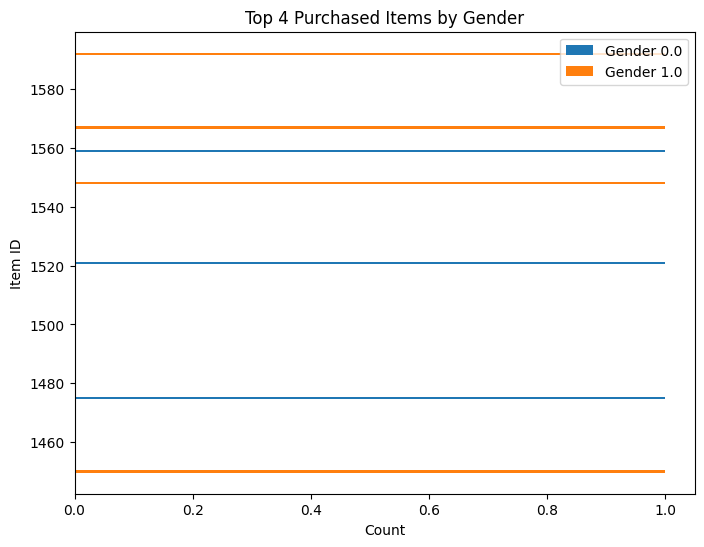

In [8]:

# Merge the user behavior and user profile data based on user_id
df_merged = pd.merge(df_user_behavior_logs, df_user_profile, on='user_id')

# Count the occurrences of each item by gender
item_counts_by_gender = df_merged[df_merged['action_type'] == 2].groupby(['gender', 'item_id']).size().reset_index(name='count')

# Set the number of top items to display
N = 4

# Get the top N items purchased by gender
top_items_by_gender = item_counts_by_gender.groupby('gender').apply(lambda x: x.nlargest(N, 'count')).reset_index(drop=True)

# Create a horizontal bar plot for the top N items overall
plt.figure(figsize=(8, 6))
plt.barh(top_items_by_gender['item_id'], top_items_by_gender['count'])
plt.xlabel('Count')
plt.ylabel('Item ID')
plt.title(f'Top {N} Purchased Items Overall')
plt.show()

# Create a grouped bar plot for the top N items by gender
plt.figure(figsize=(8, 6))
gender_groups = top_items_by_gender.groupby('gender')
for gender, group in gender_groups:
    plt.barh(group['item_id'], group['count'], label=f'Gender {gender}')
plt.xlabel('Count')
plt.ylabel('Item ID')
plt.title(f'Top {N} Purchased Items by Gender')
plt.legend()
plt.show()


<ipython-input-9-ef6bf3aa7045>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchases['time_stamp'] = df_purchases['time_stamp'].astype(str)
<ipython-input-9-ef6bf3aa7045>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchases['month'] = df_purchases['time_stamp'].str[0:2]
<ipython-input-9-ef6bf3aa7045>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

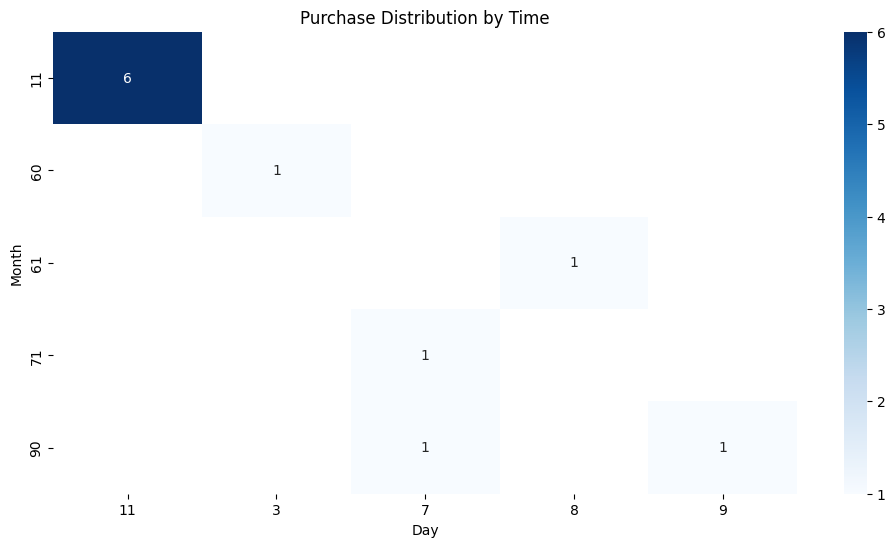

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for purchase actions only
df_purchases = df_user_behavior_logs[df_user_behavior_logs['action_type'] == 2]

# Convert 'time_stamp' column to string type
df_purchases['time_stamp'] = df_purchases['time_stamp'].astype(str)

# Extract the month and day from the timestamp
df_purchases['month'] = df_purchases['time_stamp'].str[0:2]
df_purchases['day'] = df_purchases['time_stamp'].str[2:]

# Pivot the data to create a cross-tabulation
purchase_distribution = pd.pivot_table(df_purchases, values='user_id', index='month', columns='day', aggfunc='count')

# Create a heatmap for the purchase distribution by time
plt.figure(figsize=(12, 6))
sns.heatmap(purchase_distribution, cmap='Blues', annot=True, fmt='.0f', cbar=True)
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Purchase Distribution by Time')
plt.show()


<ipython-input-10-bee9d37109dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['action_type'] = df_filtered['action_type'].map({0: 'Click', 1: 'Add-to-Cart', 2: 'Purchase', 3: 'Add-to-Favourite'})


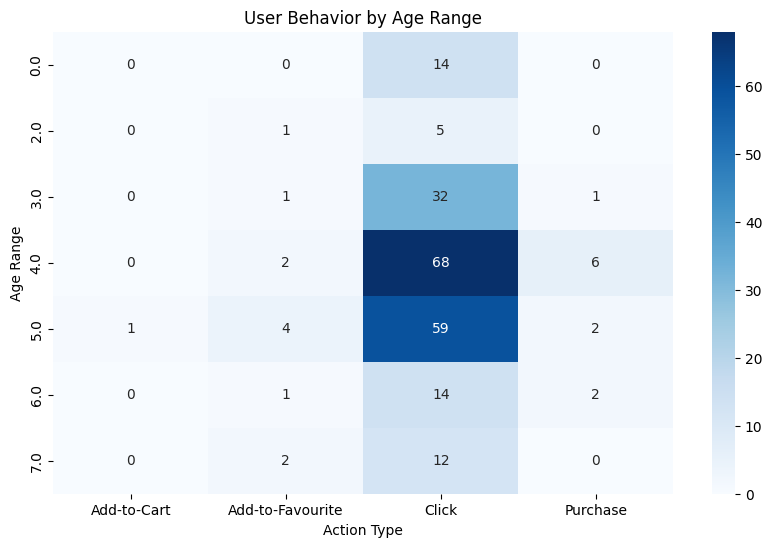

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the user behavior and user profile data based on user_id
df_merged = pd.merge(df_user_behavior_logs, df_user_profile, on='user_id')

# Filter relevant columns and rename action_type categories
df_filtered = df_merged[['age_range', 'action_type']]
df_filtered['action_type'] = df_filtered['action_type'].map({0: 'Click', 1: 'Add-to-Cart', 2: 'Purchase', 3: 'Add-to-Favourite'})

# Pivot the data to create a cross-tabulation
cross_tab = pd.crosstab(df_filtered['age_range'], df_filtered['action_type'])

# Create a heatmap for user behavior by age range
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Action Type')
plt.ylabel('Age Range')
plt.title('User Behavior by Age Range')
plt.show()


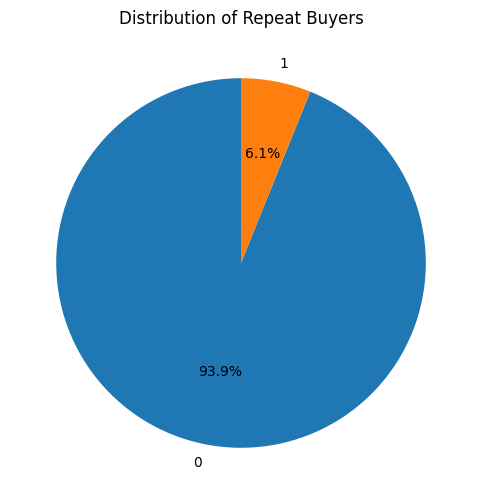

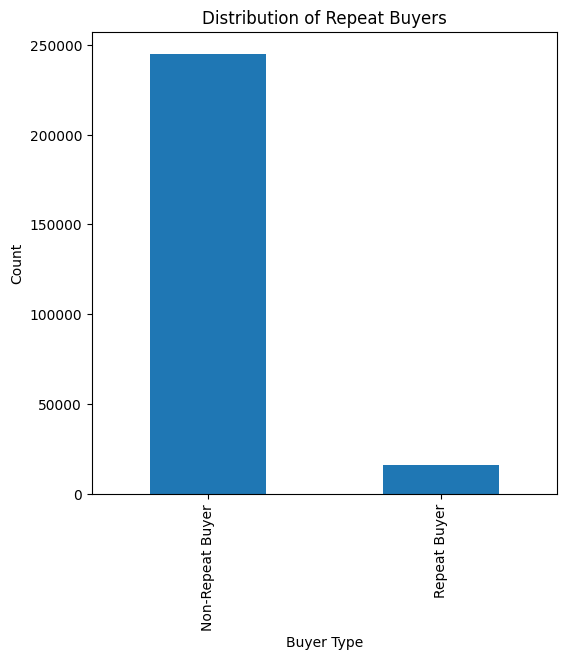

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of repeat buyers and non-repeat buyers
buyer_counts = df_train_data['label'].value_counts()

# Create a pie chart for the distribution of repeat buyers and non-repeat buyers
plt.figure(figsize=(6, 6))
plt.pie(buyer_counts, labels=buyer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Repeat Buyers')
plt.show()

# Create a bar plot for the distribution of repeat buyers and non-repeat buyers
plt.figure(figsize=(6, 6))
buyer_counts.plot(kind='bar')
plt.xlabel('Buyer Type')
plt.ylabel('Count')
plt.title('Distribution of Repeat Buyers')
plt.xticks([0, 1], ['Non-Repeat Buyer', 'Repeat Buyer'])
plt.show()
